# Importing Libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro,norm

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Importing dataset

In [2]:
data = pd.read_csv('C:/Users/pranj/Desktop/IBM dataset.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
# copy of the data

df=data.copy()
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
# information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                

In [5]:
# About the data

df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000
mean,37.055766,0.169187,809.542533,8.978261,2.879017,1.000000,731.753308,2.712665,65.643667,2.737240,2.090737,2.749527,6625.945180,14267.281664,2.706994,15.155955,3.150284,2.726843,80.000000,0.762760,11.435728,2.769376,2.763705,7.065217,4.260870,2.203214,4.142722
std,9.410421,0.375094,408.478049,8.040608,1.031442,0.000000,431.418209,1.092959,20.324861,0.704730,1.136514,1.104144,4837.695042,7048.077305,2.523526,3.641097,0.357518,1.090970,0.000000,0.837537,8.016429,1.302689,0.707392,6.265227,3.617470,3.266948,3.599044
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.250000,2.000000,2.000000,1.000000,364.500000,2.000000,48.000000,2.000000,1.000000,2.000000,2900.250000,8277.250000,1.000000,12.000000,3.000000,2.000000,80.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,817.500000,7.000000,3.000000,1.000000,723.500000,3.000000,65.000000,3.000000,2.000000,3.000000,4903.500000,14201.000000,2.000000,14.000000,3.000000,3.000000,80.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1168.500000,13.000000,4.000000,1.000000,1101.750000,4.000000,83.000000,3.000000,3.000000,4.000000,8736.500000,20364.000000,4.000000,18.000000,3.000000,4.000000,80.000000,1.000000,16.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.000000,1487.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# Unique values in columns

for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("------------------------------------------------")

Age: Number of unique values 43
------------------------------------------------
Attrition: Number of unique values 2
------------------------------------------------
BusinessTravel: Number of unique values 3
------------------------------------------------
DailyRate: Number of unique values 731
------------------------------------------------
Department: Number of unique values 3
------------------------------------------------
DistanceFromHome: Number of unique values 29
------------------------------------------------
Education: Number of unique values 5
------------------------------------------------
EducationField: Number of unique values 6
------------------------------------------------
EmployeeCount: Number of unique values 1
------------------------------------------------
EmployeeNumber: Number of unique values 1058
------------------------------------------------
EnvironmentSatisfaction: Number of unique values 4
------------------------------------------------
Gender: Numb

We notice that:
'EmployeeCount', 'Over18', 'StandardHours' have only one unique values and 'EmployeeNumber' has 1470 unique values.
This features aren't useful for us. So we are going to drop those columns.

In [8]:
df.shape

(1058, 35)

In [9]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [10]:
df.shape

(1058, 31)

In [11]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("----------------------------------------")

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        746
Travel_Frequently    205
Non-Travel           107
Name: BusinessTravel, dtype: int64
----------------------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    701
Sales                     319
Human Resources            38
Name: Department, dtype: int64
----------------------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       436
Medical             330
Marketing           122
Technical Degree     96
Other                59
Human Resources      15
Name: EducationField, dtype: int64
----------------------------------------
Gender : ['Female' 'Male']
Male      620
Female    438
Name: Gender, dtype: int64
----------------------------------------
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Health

In [12]:
len(object_col)

7

In [13]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("--------------------------------")
disc_col.remove('Attrition')

Attrition : [1 0]
--------------------------------
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
--------------------------------
Education : [2 1 4 3 5]
--------------------------------
EnvironmentSatisfaction : [2 3 4 1]
--------------------------------
JobInvolvement : [3 2 4 1]
--------------------------------
JobLevel : [2 1 3 4 5]
--------------------------------
JobSatisfaction : [4 2 3 1]
--------------------------------
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
--------------------------------
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
--------------------------------
PerformanceRating : [3 4]
--------------------------------
RelationshipSatisfaction : [1 4 2 3]
--------------------------------
StockOptionLevel : [0 1 3 2]
--------------------------------
TrainingTimesLastYear : [0 3 2 5 1 4 6]
--------------------------------
WorkLifeBalance : [1 3 2 4]
--------------------------------
Yea

In [14]:
len(disc_col)

16

In [15]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("------------------------------------")

Age : Minimum: 18, Maximum: 60
------------------------------------
DailyRate : Minimum: 102, Maximum: 1499
------------------------------------
HourlyRate : Minimum: 30, Maximum: 100
------------------------------------
MonthlyIncome : Minimum: 1009, Maximum: 19999
------------------------------------
MonthlyRate : Minimum: 2094, Maximum: 26999
------------------------------------
TotalWorkingYears : Minimum: 0, Maximum: 40
------------------------------------
YearsAtCompany : Minimum: 0, Maximum: 40
------------------------------------


In [16]:
len(cont_col)

7

# Visualisation of Columns

<AxesSubplot:xlabel='DailyRate'>

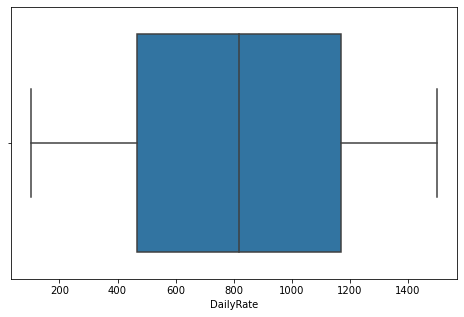

In [17]:
plt.figure(figsize = (8,5))
sns.boxplot(data = df , x = 'DailyRate',hue = 'Attrition')

<AxesSubplot:xlabel='HourlyRate'>

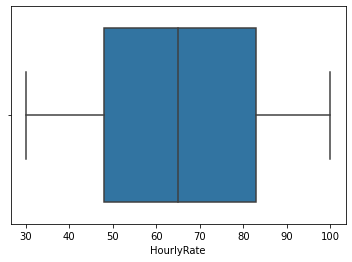

In [18]:
sns.boxplot(data = df , x = 'HourlyRate',hue = 'Attrition')

<AxesSubplot:xlabel='MonthlyRate'>

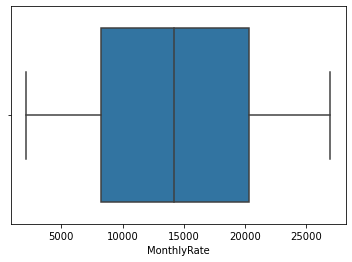

In [20]:
sns.boxplot(data = df , x = 'MonthlyRate',hue = 'Attrition')

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Count'>

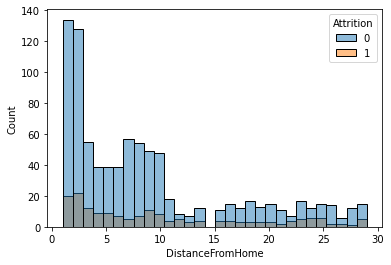

In [21]:
sns.histplot(data = df , x = 'DistanceFromHome',hue = 'Attrition',bins = 30)

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Count'>

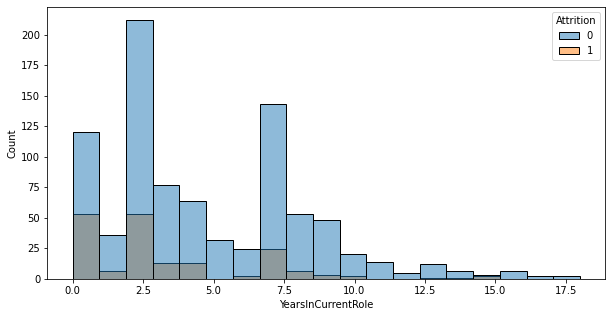

In [19]:
plt.figure(figsize = (10,5))
sns.histplot(data = df , x = 'YearsInCurrentRole',hue = 'Attrition')

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Count'>

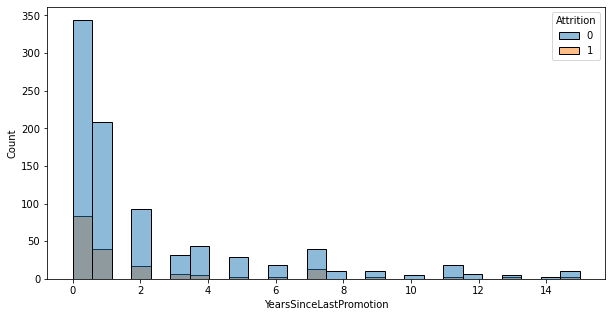

In [20]:
plt.figure(figsize = (10,5))
sns.histplot(data = df , x = 'YearsSinceLastPromotion',hue = 'Attrition')

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Count'>

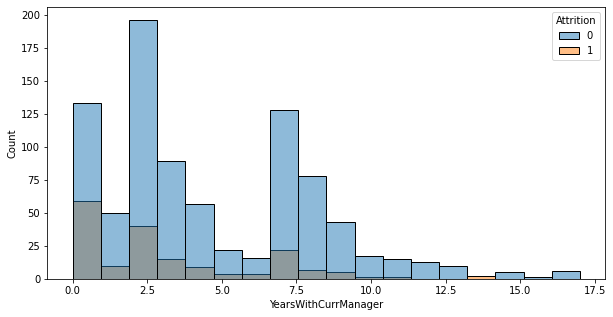

In [21]:
plt.figure(figsize = (10,5))

sns.histplot(data = df , x = 'YearsWithCurrManager',hue = 'Attrition')

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Count'>

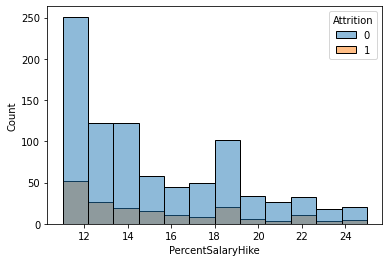

In [24]:
sns.histplot(data = df , x = 'PercentSalaryHike',hue = 'Attrition')

<AxesSubplot:xlabel='Age', ylabel='Count'>

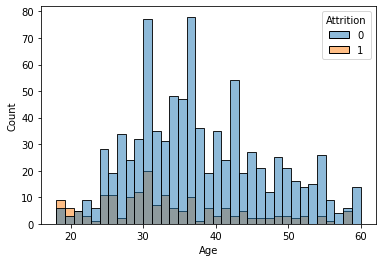

In [25]:
sns.histplot(data = df , x = 'Age',hue = 'Attrition',bins = 35)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

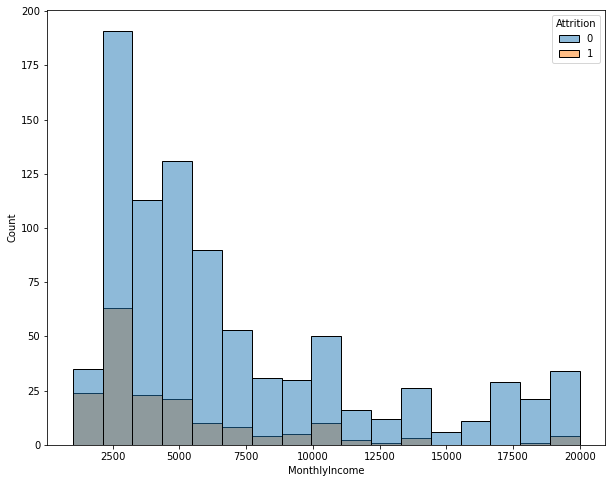

In [31]:
plt.figure(figsize = (10,8))

sns.histplot(data = df , x = 'MonthlyIncome',hue = 'Attrition')

<AxesSubplot:xlabel='MonthlyIncome'>

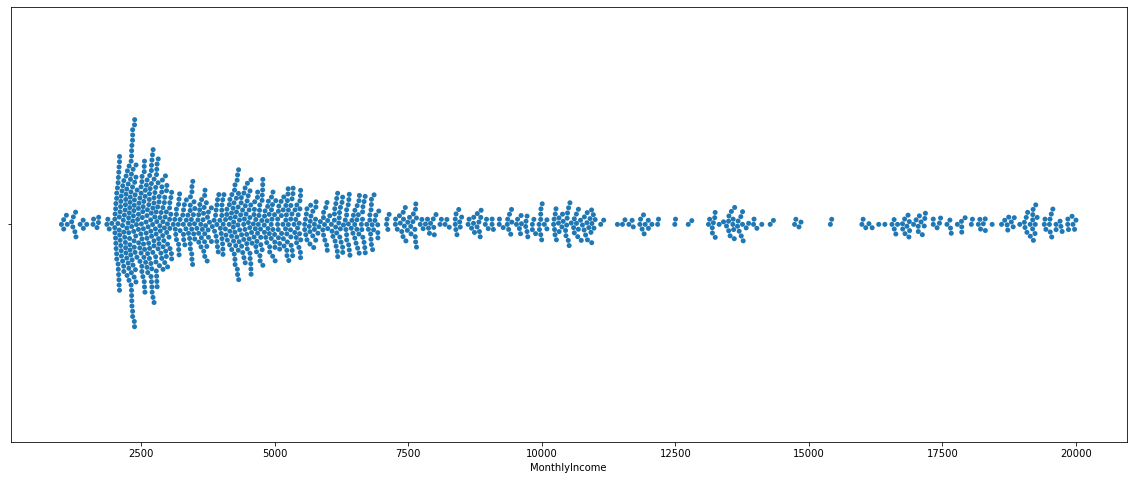

In [32]:
plt.figure(figsize = (20,8))

sns.swarmplot(data = df , x = 'MonthlyIncome',hue = 'Attrition')

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Count'>

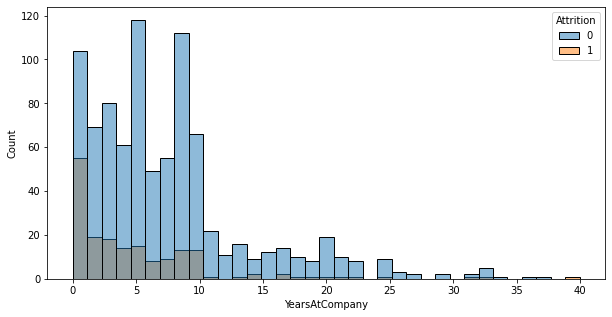

In [33]:
plt.figure(figsize= (10,5))
sns.histplot(data = df , x = 'YearsAtCompany',hue = 'Attrition',bins = 35)

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Count'>

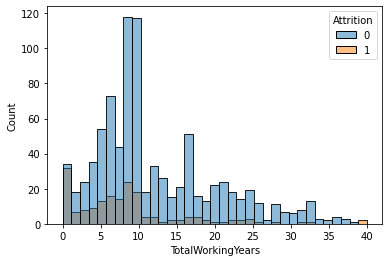

In [34]:
sns.histplot(data = df , x = 'TotalWorkingYears',hue = 'Attrition',bins = 35)

<AxesSubplot:xlabel='Education', ylabel='count'>

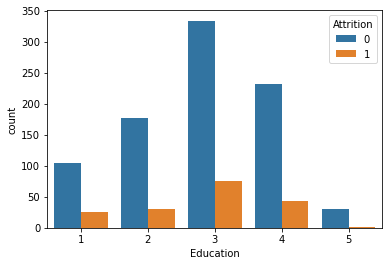

In [22]:
sns.countplot(data = df , x = 'Education',hue = 'Attrition')

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

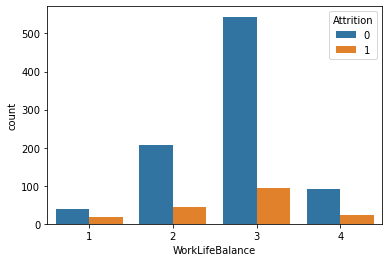

In [23]:
sns.countplot(data = df , x = 'WorkLifeBalance',hue = 'Attrition')

<AxesSubplot:xlabel='EducationField', ylabel='count'>

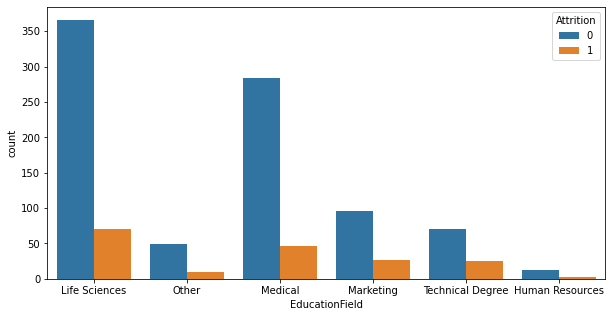

In [26]:
plt.figure(figsize = (10,5))

sns.countplot(data = df , x = 'EducationField',hue = 'Attrition')

<AxesSubplot:xlabel='JobRole', ylabel='count'>

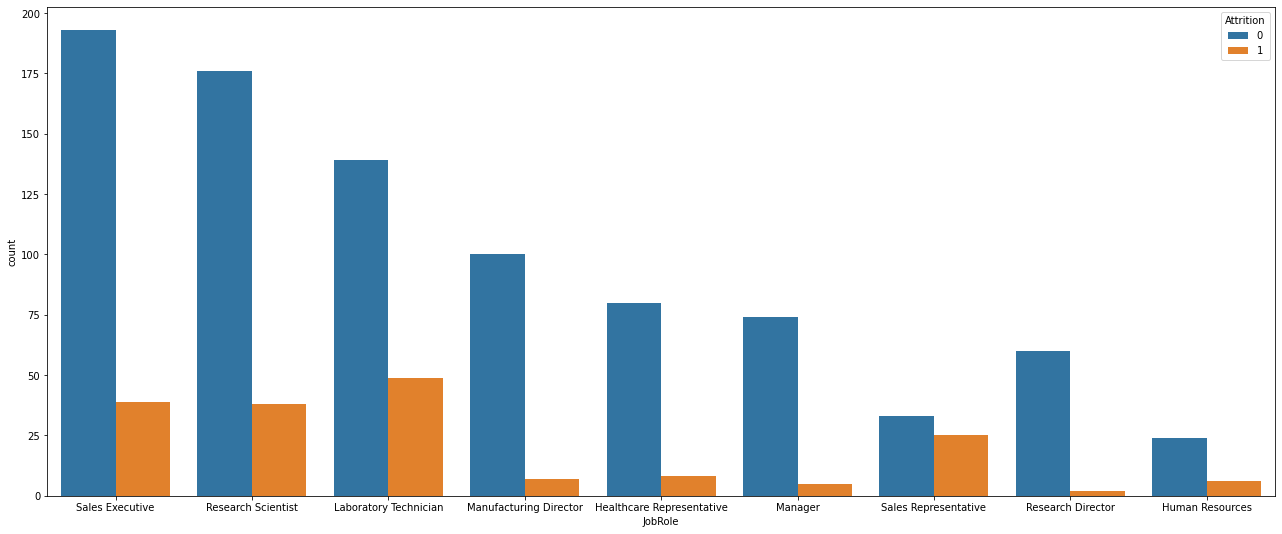

In [28]:
plt.figure(figsize = (22,9))

sns.countplot(data = df , x = 'JobRole',hue = 'Attrition')

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

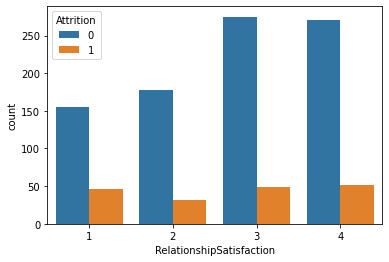

In [29]:
sns.countplot(data = df , x = 'RelationshipSatisfaction',hue = 'Attrition')

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

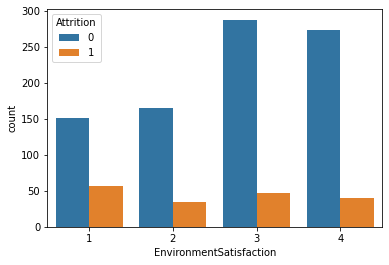

In [30]:
sns.countplot(data = df , x = 'EnvironmentSatisfaction',hue = 'Attrition')

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

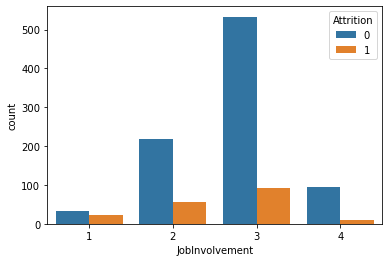

In [31]:
sns.countplot(data = df , x = 'JobInvolvement',hue = 'Attrition')

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

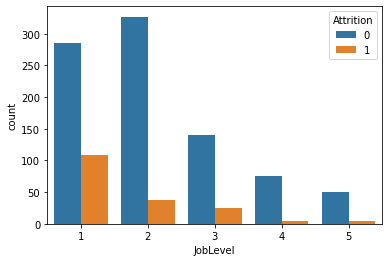

In [32]:
sns.countplot(data = df , x = 'JobLevel',hue = 'Attrition')

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

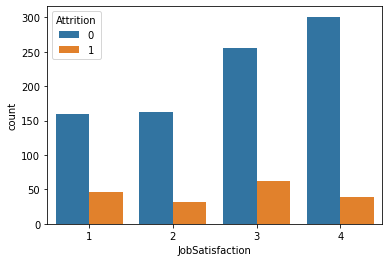

In [33]:
sns.countplot(data = df , x = 'JobSatisfaction',hue = 'Attrition')

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

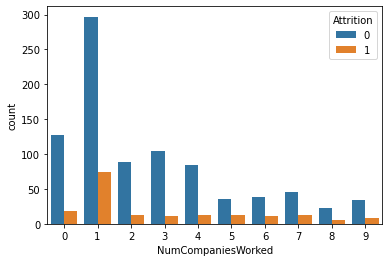

In [34]:
sns.countplot(data = df , x = 'NumCompaniesWorked',hue = 'Attrition')

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

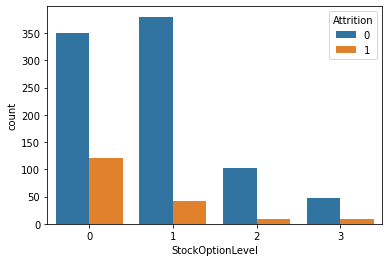

In [36]:
sns.countplot(data = df , x = 'StockOptionLevel',hue = 'Attrition')

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

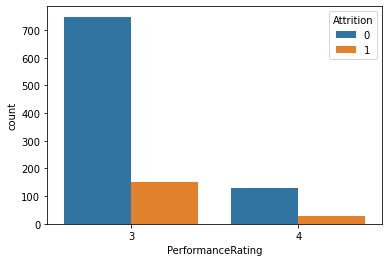

In [37]:
sns.countplot(data = df , x = 'PerformanceRating',hue = 'Attrition')

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

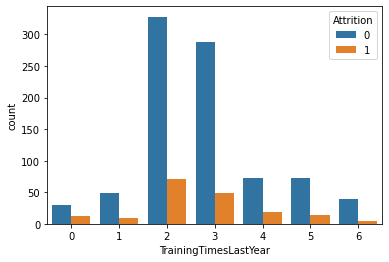

In [38]:
sns.countplot(data = df , x = 'TrainingTimesLastYear',hue = 'Attrition')

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

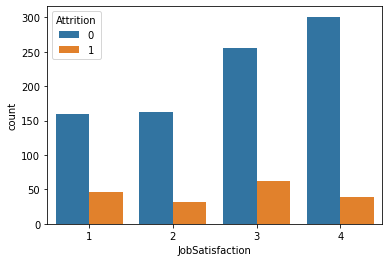

In [39]:
sns.countplot(data = df , x = 'JobSatisfaction',hue = 'Attrition')

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

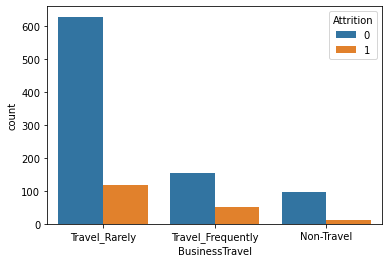

In [45]:
sns.countplot(data = df , x = 'BusinessTravel',hue = 'Attrition')

<AxesSubplot:xlabel='Department', ylabel='count'>

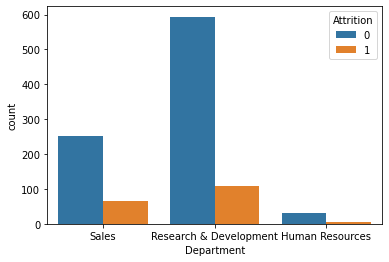

In [46]:
sns.countplot(data = df , x = 'Department',hue = 'Attrition')

<AxesSubplot:xlabel='Gender', ylabel='count'>

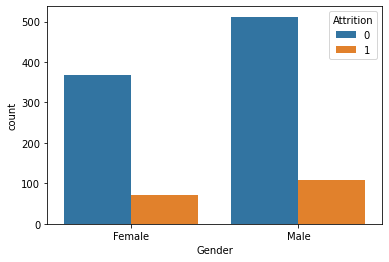

In [47]:
sns.countplot(data = df , x= 'Gender',hue = 'Attrition')

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

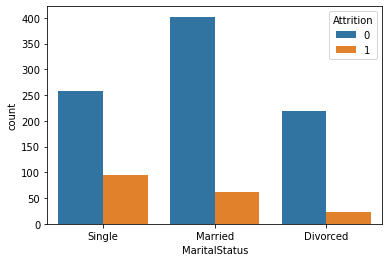

In [48]:
sns.countplot(data = df , x = 'MaritalStatus',hue = 'Attrition')

<AxesSubplot:xlabel='OverTime', ylabel='count'>

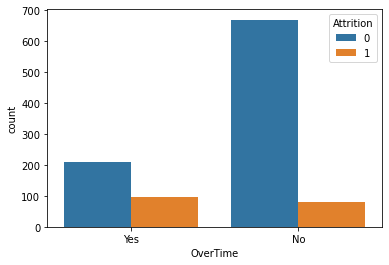

In [49]:
sns.countplot(data = df , x = 'OverTime',hue = 'Attrition')

In [50]:
# It seems that EnvironmentSatisfaction, JobSatisfaction, PerformanceRating, and RelationshipSatisfaction 
# features don't have big impact on the detrmination of Attrition of employees.

# The workers with low JobLevel, MonthlyIncome, YearAtCompany, and TotalWorkingYears are more likely to quit there jobs.

# BusinessTravel : The workers who travel alot are more likely to quit then other employees.

# Department : The worker in Research & Development are more likely to stay then the workers on other departement.

# EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

# Gender : The Male are more likely to quit.

# JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

# MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

# OverTime : The workers who work more hours are likely to quit then others.